In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('mushrooms.csv')
Y = df.iloc[:,0].values
df = df.iloc[:,1:].apply(LabelEncoder().fit_transform)
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [3]:
labels = np.unique(Y)
Y = LabelEncoder().fit_transform(Y)

In [4]:
def PCA(X, dimensions = 2):
    X = X - np.tile(np.mean(X, 0), (X.shape[0], 1))
    _, eigenvectors = np.linalg.eig(np.dot(X.T, X))
    Y = np.dot(X, eigenvectors[:, :dimensions])
    return Y

In [5]:
df_normalized = MinMaxScaler().fit_transform(df.values)
df_standardized = StandardScaler().fit_transform(df.values)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
pca = PCA(df.values)
pca_normalized = PCA(df_normalized)
pca_standardized = PCA(df_standardized)

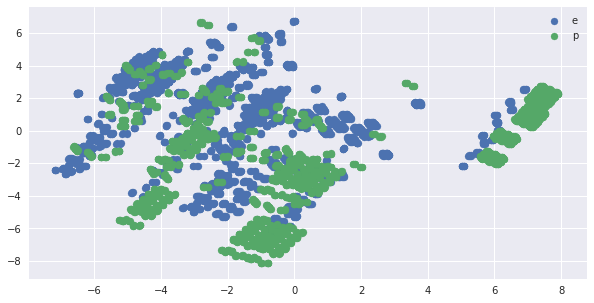

In [7]:
plt.figure(figsize=(10,5))
for no, i in enumerate(np.unique(Y)):
    plt.scatter(pca[Y==i,0], pca[Y==i,1], label=labels[no])
plt.legend()
plt.show()

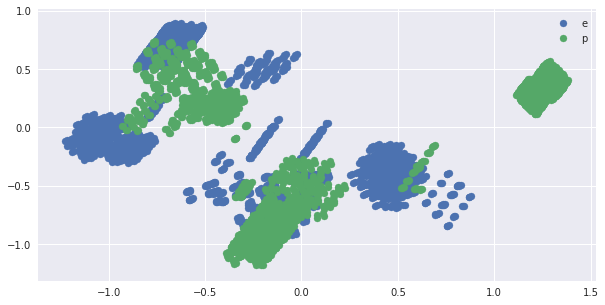

In [8]:
plt.figure(figsize=(10,5))
for no, i in enumerate(np.unique(Y)):
    plt.scatter(pca_normalized[Y==i,0], pca_normalized[Y==i,1], label=labels[no])
plt.legend()
plt.show()

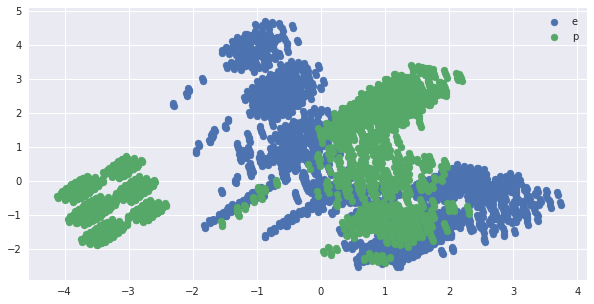

In [9]:
plt.figure(figsize=(10,5))
for no, i in enumerate(np.unique(Y)):
    plt.scatter(pca_standardized[Y==i,0], pca_standardized[Y==i,1], label=labels[no])
plt.legend()
plt.show()

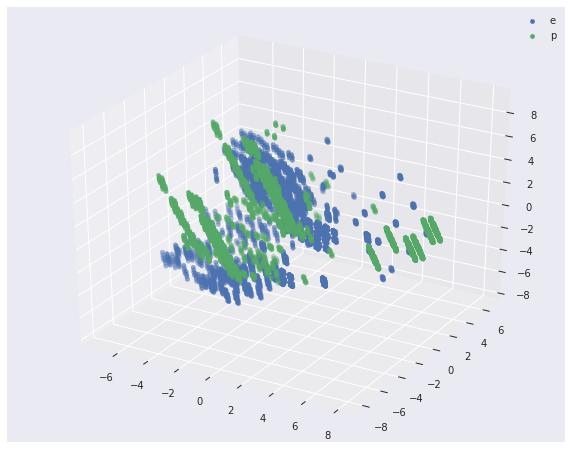

In [10]:
pca_3d = PCA(df.values, dimensions=3)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
for no, i in enumerate(np.unique(Y)):
    ax.scatter(pca_3d[Y==i,0], pca_3d[Y==i,1], pca_3d[Y==i,2], label=labels[no])
plt.legend()
plt.show()